# Logistic Regression (SGD)

In [1]:
import numpy as np

In [2]:
from sklearn.metrics import f1_score

from matplotlib import pyplot as plt

In [33]:
class LogisticRegression:
    """Logistic Regression implementation.

    This class provides functionalities to perform logistic regression. Check the fit method.
    Expects a shuffled dataset.
    """
    
    e = 1e-35
    
    def __init__(self):
        """To add globals if required to make model persistent."""
        
        pass
    
    def sigmoid_dot(self, X, W, b):
        """Returns sigmoid of (W.X + b)"""
        
        return 1 / (1 + np.exp(-(np.dot(X, W) + b)))
    
    def update(self, X, res, y, y_, W, b, alpha, m):
        """Updates W, b stochastically for each datapoint."""
        
        #res = y-y_
        for i in range(m):

            dJ_dW = np.dot(res[i],X[i])
            dJ_db = np.mean(res)
            
            W += alpha * dJ_dW / m
            b += alpha * dJ_db / m
        return W, b 
    def create_plot(self, costs):
        plt.plot([x for x in range(0,len(costs["cost"]))], costs["cost"])
        plt.plot([x for x in range(0,len(costs["vcost"]))], costs["vcost"])
    
    def cost(self, y, y_, e=e):
        """Returns logistic cost between predicted values and true labels."""
        
        m = y.shape[0]
        c = 0
        
        for i in range(m):
            c += y[i] * np.log(y_[i] + e) + (1 - y[i]) * np.log(1 - y_[i] + e)
        return c / (-m)
    
    def fit(self, X, y, iterations=1000, alpha=0.000001, validation_size=0.4):
        """
        Fits the logistic regression model to the training data.

        Parameters
        ----------
        X : np.ndarray
            Input data of shape (m, n).
        y : np.ndarray
            True labels of shape (m,).
        iterations : int, optional
            Number of iterations for training. Default is 1000.
        alpha : float, optional
            Learning rate. Default is 0.000001

        Returns
        -------
        tuple
            Trained model parameters W and b.
        """
        val = int(X.shape[0]*(1-validation_size))
        X_val, y_val = X[val:], y[val:]
        X, y =  X[:val], y[:val]
        
        costs = {"cost":[], "vcost":[]}
        
        print(X.shape, y.shape, X_val.shape, y_val.shape)
        m, n = X.shape
        W = np.zeros(n)
        b = 0
        
        for k in range(iterations):
            y_ = self.sigmoid_dot(X, W, b)
            
            y_val_ = self.sigmoid_dot(X_val, W, b)
            res = y - y_
            W, b = self.update(X, res, y, y_, W, b, alpha,m)
            
            costs["cost"].append(self.cost(y, y_))
            costs["vcost"].append(self.cost(y_val,y_val_))
            if k%(iterations//10) == 0:
                print(f"Iteration: {k}",
                      f"Cost: {self.cost(y, y_)}",
                      f"vCost: {self.cost(y_val,y_val_)}",
                      f"f1: {f1_score(y, y_.round()):.5f}",
                      f"vf1: {f1_score(y_val, y_val_.round()):.5f}"
                     )
            
        self.create_plot(costs)
        return W, b, costs
    
    def predict(self, X, W, b):
        """Generates predictions for input data X using trained model parameters W and b.
        
        Returns rounded predictions. Might need to fix.
        """
        
        s = self.sigmoid_dot(X, W, b)
        return s.round()

# Dataset Tests

Multilabel Dataset. Using 2 targets at a time as Model is Binary.

In [4]:
from sklearn.datasets import make_classification

In [5]:
X, y = make_classification(1000, 4, random_state=0)

(600, 4) (600,) (400, 4) (400,)
Iteration: 0 Cost: 0.6931471805599468 vCost: 0.6931471805599467 f1: 0.00000 vf1: 0.00000
Iteration: 10 Cost: 0.43497569721333473 vCost: 0.44190237188607584 f1: 0.94825 vf1: 0.92583
Iteration: 20 Cost: 0.3379055430502561 vCost: 0.34812046413425685 f1: 0.94649 vf1: 0.92308
Iteration: 30 Cost: 0.28906354350790747 vCost: 0.3014717980305317 f1: 0.94807 vf1: 0.92308
Iteration: 40 Cost: 0.25986970112805363 vCost: 0.27395895535404785 f1: 0.94983 vf1: 0.92308
Iteration: 50 Cost: 0.24049658649071104 vCost: 0.25595741763316676 f1: 0.94983 vf1: 0.92583
Iteration: 60 Cost: 0.22671853582756493 vCost: 0.2433383152097505 f1: 0.94983 vf1: 0.92583
Iteration: 70 Cost: 0.2164269074568394 vCost: 0.23404854243948722 f1: 0.94983 vf1: 0.92583
Iteration: 80 Cost: 0.2084535777719447 vCost: 0.22695556417792875 f1: 0.94983 vf1: 0.92583
Iteration: 90 Cost: 0.20209956476985752 vCost: 0.22138488447409194 f1: 0.94807 vf1: 0.92583


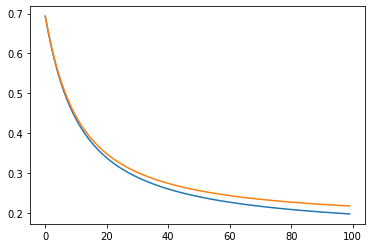

In [6]:
m = LogisticRegression()
W, b, costs = m.fit(X, y, 100, 0.1)

In [7]:
from sklearn.datasets import load_breast_cancer

In [8]:
X,y = load_breast_cancer(return_X_y=True)

(341, 30) (341,) (228, 30) (228,)
Iteration: 0 Cost: 0.6931471805599467 vCost: 0.6931471805599465 f1: 0.00000 vf1: 0.00000
Iteration: 150 Cost: 0.5837144114322022 vCost: 0.6763935430817721 f1: 0.04255 vf1: 0.03409
Iteration: 300 Cost: 0.540976622901295 vCost: 0.6248658646112127 f1: 0.70748 vf1: 0.62745
Iteration: 450 Cost: 0.5098349394435076 vCost: 0.5875699236676227 f1: 0.85207 vf1: 0.79054
Iteration: 600 Cost: 0.48555711848589655 vCost: 0.5585966088903646 f1: 0.91111 vf1: 0.86076
Iteration: 750 Cost: 0.4657843894666267 vCost: 0.5350901326076919 f1: 0.91892 vf1: 0.89634
Iteration: 900 Cost: 0.4491808663191332 vCost: 0.5154414299532398 f1: 0.92225 vf1: 0.92353
Iteration: 1050 Cost: 0.4349202929036614 vCost: 0.4986499313561234 f1: 0.91979 vf1: 0.92398
Iteration: 1200 Cost: 0.4224580534946268 vCost: 0.4840508104780657 f1: 0.92308 vf1: 0.92711
Iteration: 1350 Cost: 0.41141752461348907 vCost: 0.47118078845322336 f1: 0.92593 vf1: 0.93023


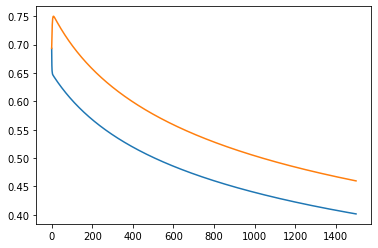

In [9]:
m = LogisticRegression()
W, b, costs = m.fit(X, y, 1000+500, 0.000001)

In [10]:
from sklearn.datasets import make_circles

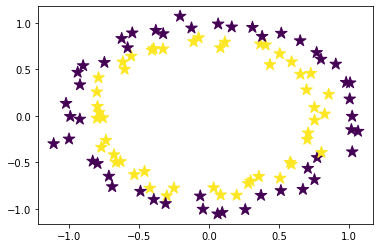

In [12]:
X,y = make_circles(noise=0.05)
a = X[:,0]
b = X[:,1]
plt.scatter(a, b, c=y, marker="*", s=150)

X_p = np.c_[a, b, a**2, a*b, b**2]

(60, 5) (60,) (40, 5) (40,)
Iteration: 0 Cost: 0.6931471805599451 vCost: 0.6931471805599446 f1: 0.00000 vf1: 0.00000
Iteration: 100 Cost: 0.5736822420733454 vCost: 0.5982673904239418 f1: 0.91429 vf1: 0.80000
Iteration: 200 Cost: 0.4939177477447577 vCost: 0.5117905752671392 f1: 0.95652 vf1: 0.86486
Iteration: 300 Cost: 0.4355632661175826 vCost: 0.44836107289099536 f1: 0.97059 vf1: 0.86486
Iteration: 400 Cost: 0.39147071754163437 vCost: 0.400694039274245 f1: 0.97059 vf1: 0.89474
Iteration: 500 Cost: 0.3571396473696465 vCost: 0.3639301581136499 f1: 0.95652 vf1: 0.89474
Iteration: 600 Cost: 0.3296874973663867 vCost: 0.3349154162042092 f1: 0.97059 vf1: 0.91892
Iteration: 700 Cost: 0.3072260211849536 vCost: 0.311560619757121 f1: 0.97059 vf1: 0.94444
Iteration: 800 Cost: 0.28848451064017405 vCost: 0.29244435003484026 f1: 0.97059 vf1: 0.94444
Iteration: 900 Cost: 0.27258386075659957 vCost: 0.2765729804530196 f1: 0.97059 vf1: 0.94444


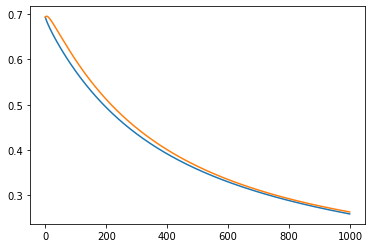

In [13]:
m = LogisticRegression()
W, b, costs = m.fit(X_p, y, 1000, 0.5)

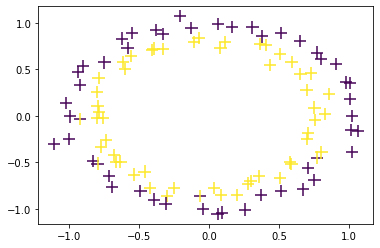

In [14]:
y_ = m.predict(X_p, W, b)
plt.scatter(X[:,0], X[:,1], c=y, marker="_", s=150)
plt.scatter(X[:,0], X[:,1], c=y_, marker="|", s=150)

In [15]:
from sklearn.datasets import make_moons

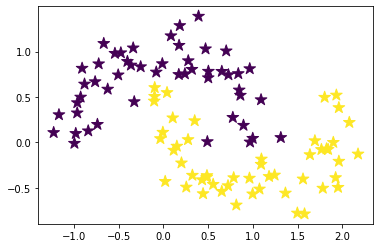

In [16]:
X,y = make_moons(noise=0.2)
a = X[:,0]
b = X[:,1]
plt.scatter(a, b, c=y, marker="*", s=150)

X_p = np.c_[a, b, a**2, a*b, b**2, a**3, b**3, (a**2)*b, a*(b**2)]

(60, 9) (60,) (40, 9) (40,)
Iteration: 0 Cost: 0.6931471805599451 vCost: 0.6931471805599446 f1: 0.00000 vf1: 0.00000
Iteration: 100 Cost: 0.2592649416179465 vCost: 0.2636044092509764 f1: 0.87273 vf1: 0.88372
Iteration: 200 Cost: 0.22533576421356552 vCost: 0.22816098275586066 f1: 0.87273 vf1: 0.90909
Iteration: 300 Cost: 0.20645861087105272 vCost: 0.20634741325076394 f1: 0.91228 vf1: 0.90909
Iteration: 400 Cost: 0.1927238803129129 vCost: 0.18963072677203413 f1: 0.91228 vf1: 0.90909
Iteration: 500 Cost: 0.18182979542004715 vCost: 0.17601168413731924 f1: 0.92857 vf1: 0.90909
Iteration: 600 Cost: 0.1728578784584995 vCost: 0.16465319523298144 f1: 0.92857 vf1: 0.90909
Iteration: 700 Cost: 0.16530728688718355 vCost: 0.15505168695457025 f1: 0.92857 vf1: 0.90909
Iteration: 800 Cost: 0.1588543601301424 vCost: 0.14684837259957018 f1: 0.92857 vf1: 0.90909
Iteration: 900 Cost: 0.15327098926556854 vCost: 0.1397711430555111 f1: 0.92857 vf1: 0.90909


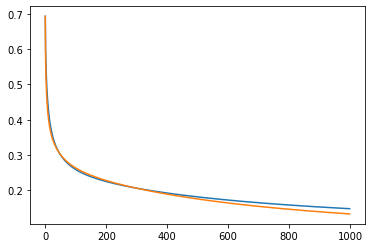

In [17]:
m = LogisticRegression()
W, b, costs = m.fit(X_p, y, 1000, 0.25)

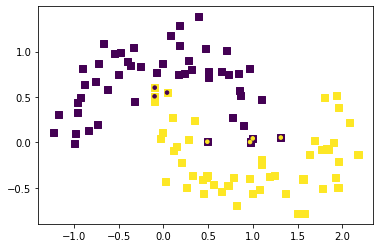

In [32]:
y_ = m.predict(X_p, W, b)
plt.scatter(X[:,0], X[:,1], c=y, marker=",", s=50)
plt.scatter(X[:,0], X[:,1], c=y_, marker=".", s=50)